# Acquire

- predict the property tax assessed values ('taxvaluedollarcnt') of Single Family Properties that had a transaction during 2017

In [1]:
import sys
import os
home_directory_path = os.path.expanduser('~')
sys.path.append(home_directory_path +'/utils')
import acquire_utils
from prepare_utils import identify_cols_with_white_space
import explore_utils

import pandas as pd
pd.set_option('display.max_columns', 100)

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pandas as pd
import env
import os


def get_connection(db, user=env.user, host=env.host, password=env.pwd):
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'
    

def get_sql_data(sql_query, db, filename):
    '''
    If the csv file exists, it is read and returned as a pandas DataFrame
    If not, pandas reads in a SQL query that acquires telco customer data from a MySQL database.
    The query is stored into a DataFrame, saved, and returned.
    '''
    # Read the SQL query into a dataframe
    df = pd.read_sql(sql_query,
                        get_connection(db))
    # Write that DataFrame for prep
    df.to_csv(filename, index=False)
    # Return the DataFrame
    return df

In [3]:
query = '''
        SELECT p.parcelid, p.id, p.bathroomcnt, p.bedroomcnt, p.calculatedbathnbr,
                p.calculatedfinishedsquarefeet, p.fips, p.fullbathcnt,
                p.latitude, p.longitude, p.roomcnt,  p.numberofstories, p.yearbuilt,
                p.regionidcity, p.regionidcounty, p.regionidneighborhood,
                p.regionidzip, p.taxvaluedollarcnt, pred.transactiondate
        FROM zillow.properties_2017 AS p
            JOIN zillow.predictions_2017 AS pred USING (parcelid)
        WHERE (p.propertylandusetypeid IN (261, 262, 263, 264, 279));
        '''
db = 'zillow'
filename = 'data/zillow_raw.csv'

df = get_sql_data(query, db, filename)

I want to inspect values and their counts and note any oddities and insights (not EDA)

In [4]:
display(df.info())
display(df.head(8))
for col in df.columns:
    print('-'*25)
    print(col)
    display(df[col].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52522 entries, 0 to 52521
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      52522 non-null  int64  
 1   id                            52522 non-null  int64  
 2   bathroomcnt                   52522 non-null  float64
 3   bedroomcnt                    52522 non-null  float64
 4   calculatedbathnbr             52371 non-null  float64
 5   calculatedfinishedsquarefeet  52427 non-null  float64
 6   fips                          52522 non-null  float64
 7   fullbathcnt                   52371 non-null  float64
 8   latitude                      52522 non-null  float64
 9   longitude                     52522 non-null  float64
 10  roomcnt                       52522 non-null  float64
 11  numberofstories               14568 non-null  float64
 12  yearbuilt                     52393 non-null  float64
 13  r

None

,parcelid,id,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,fips,fullbathcnt,latitude,longitude,roomcnt,numberofstories,yearbuilt,regionidcity,regionidcounty,regionidneighborhood,regionidzip,taxvaluedollarcnt,transactiondate
0,14297519,1727539,3.5,4.0,3.5,3100.0,6059.0,3.0,33634931.0,-117869207.0,0.0,NaN,1998.0,53571.0,1286.0,NaN,96978.0,1023282.0,2017-01-01
1,17052889,1387261,1.0,2.0,1.0,1465.0,6111.0,1.0,34449266.0,-119281531.0,5.0,1.0,1967.0,13091.0,2061.0,NaN,97099.0,464000.0,2017-01-01
2,14186244,11677,2.0,3.0,2.0,1243.0,6059.0,2.0,33886168.0,-117823170.0,6.0,1.0,1962.0,21412.0,1286.0,NaN,97078.0,564778.0,2017-01-01
3,12177905,2288172,3.0,4.0,3.0,2376.0,6037.0,3.0,34245180.0,-118240722.0,0.0,NaN,1970.0,396551.0,3101.0,NaN,96330.0,145143.0,2017-01-01
4,12095076,781532,3.0,4.0,3.0,2962.0,6037.0,3.0,34145202.0,-118179824.0,0.0,NaN,1950.0,47019.0,3101.0,274684.0,96293.0,773303.0,2017-01-01
5,12069064,870991,1.0,2.0,1.0,738.0,6037.0,1.0,34149214.0,-118239357.0,0.0,NaN,1922.0,45457.0,3101.0,276258.0,96325.0,218552.0,2017-01-01
6,12790562,1246926,3.0,4.0,3.0,3039.0,6037.0,3.0,33960230.0,-118006914.0,0.0,NaN,1970.0,14634.0,3101.0,NaN,96173.0,220583.0,2017-01-02
7,11104527,1639362,3.0,4.0,3.0,2540.0,6037.0,3.0,34434971.0,-118464390.0,0.0,NaN,1999.0,54311.0,3101.0,37739.0,96374.0,430108.0,2017-01-02


-------------------------
parcelid


13083743    3
11991059    3
14079874    2
12827519    2
12847318    2
           ..
12482514    1
10720574    1
12483845    1
13077156    1
12826780    1
Name: parcelid, Length: 52400, dtype: int64

-------------------------
id


2455685    3
1968735    3
1980108    2
2782611    2
471520     2
          ..
1245656    1
1433044    1
2274554    1
1710698    1
1187175    1
Name: id, Length: 52400, dtype: int64

-------------------------
bathroomcnt


2.0     21952
3.0     10680
1.0      9569
2.5      3934
4.0      2227
3.5       918
1.5       841
5.0       803
4.5       687
6.0       322
5.5       224
0.0       135
7.0        88
8.0        53
6.5        47
7.5        16
9.0        13
10.0        5
11.0        3
8.5         3
18.0        1
13.0        1
Name: bathroomcnt, dtype: int64

-------------------------
bedroomcnt


3.0     23403
4.0     15250
2.0      8352
5.0      3973
6.0       635
1.0       612
0.0       152
7.0       106
8.0        24
9.0         8
12.0        3
10.0        2
14.0        1
11.0        1
Name: bedroomcnt, dtype: int64

-------------------------
calculatedbathnbr


2.0     21952
3.0     10680
1.0      9569
2.5      3926
4.0      2227
3.5       918
1.5       834
5.0       803
4.5       687
6.0       322
5.5       223
7.0        88
8.0        53
6.5        47
7.5        16
9.0        13
10.0        5
11.0        3
8.5         3
18.0        1
13.0        1
Name: calculatedbathnbr, dtype: int64

-------------------------
calculatedfinishedsquarefeet


1120.0    128
1200.0    119
1080.0    103
1040.0     86
936.0      86
         ... 
7088.0      1
604.0       1
5422.0      1
534.0       1
5655.0      1
Name: calculatedfinishedsquarefeet, Length: 4723, dtype: int64

-------------------------
fips


6037.0    33972
6059.0    14145
6111.0     4405
Name: fips, dtype: int64

-------------------------
fullbathcnt


2.0     25890
3.0     11607
1.0     10403
4.0      2915
5.0      1022
6.0       359
7.0        96
8.0        56
9.0        13
10.0        5
11.0        3
18.0        1
13.0        1
Name: fullbathcnt, dtype: int64

-------------------------
latitude


34047500.0    12
34101300.0     7
33906400.0     7
33494800.0     7
34487900.0     7
              ..
33922641.0     1
33991670.0     1
33604913.0     1
34188239.0     1
33937685.0     1
Name: latitude, Length: 50546, dtype: int64

-------------------------
longitude


-118249000.0    12
-117835000.0     8
-117879000.0     8
-117830000.0     7
-118327000.0     7
                ..
-118140773.0     1
-118405445.0     1
-118157621.0     1
-117925516.0     1
-117996709.0     1
Name: longitude, Length: 50832, dtype: int64

-------------------------
roomcnt


0.0     37927
6.0      3984
7.0      3615
8.0      2813
5.0      1895
9.0      1176
4.0       521
10.0      339
11.0      108
3.0        79
12.0       35
2.0        12
13.0       10
14.0        6
1.0         1
15.0        1
Name: roomcnt, dtype: int64

-------------------------
numberofstories


1.0    8897
2.0    5318
3.0     352
6.0       1
Name: numberofstories, dtype: int64

-------------------------
yearbuilt


1955.0    1899
1950.0    1608
1954.0    1520
1953.0    1485
1956.0    1387
          ... 
1892.0       1
1878.0       1
1882.0       1
1894.0       1
1880.0       1
Name: yearbuilt, Length: 133, dtype: int64

-------------------------
regionidcity


12447.0    11457
5534.0      1810
40227.0     1499
46298.0     1429
16764.0     1087
           ...  
32927.0        3
31134.0        2
36078.0        1
10815.0        1
21395.0        1
Name: regionidcity, Length: 175, dtype: int64

-------------------------
regionidcounty


3101.0    33972
1286.0    14145
2061.0     4405
Name: regionidcounty, dtype: int64

-------------------------
regionidneighborhood


48570.0     503
118208.0    476
27080.0     448
274049.0    391
51906.0     374
           ... 
763079.0      1
764138.0      1
763090.0      1
764167.0      1
762940.0      1
Name: regionidneighborhood, Length: 437, dtype: int64

-------------------------
regionidzip


97319.0    787
97318.0    678
97329.0    566
97328.0    521
97118.0    498
          ... 
96467.0      1
97092.0      1
96148.0      1
96038.0      1
97088.0      1
Name: regionidzip, Length: 381, dtype: int64

-------------------------
taxvaluedollarcnt


455000.0    34
600000.0    30
550000.0    24
500000.0    24
450000.0    24
            ..
315728.0     1
370475.0     1
415456.0     1
132295.0     1
49546.0      1
Name: taxvaluedollarcnt, Length: 38999, dtype: int64

-------------------------
transactiondate


2017-06-30    812
2017-04-28    619
2017-05-31    567
2017-07-28    548
2017-08-31    529
             ... 
2017-05-07      1
2017-05-13      1
2017-05-20      1
2017-06-11      1
2018-05-25      1
Name: transactiondate, Length: 258, dtype: int64

Notes:

- Look into duplicate parcelid's
- Look into duplicate locations
- 3 FIPS (county) codes: 6037 (LA), 6059 (Orange), 6111 (Ventura)
- Drop redundant columms
    - `bathroomsnbedrooms` = `bathrooms`
    - `fullbathrooms` is similar enough to drop as well
    - `roomcnt` has a mode of zero so we will drop
    - I will only want homes with 1 or 2 stories
    - columns to do univariate analysis to find outliers and/or missing values:
        - year_built
        - property_value
    - `regionidcounty` is a duplicate of `fips`, so we will drop this.
- Drop 2018 transaction date
- Filter Data:
    - 1 to 4 bathrooms
    - 2 to 5 bedrooms
    

**Drop duplicates**

Redundant Columns or Columns with lots of missing values 

In [5]:
# df = df.drop(columns=['calculatedbathnbr', 'fullbathcnt', 'roomcnt', 'regionidcounty'])

# drop redundant columns by changing query
query = '''
        SELECT p.parcelid, p.id, p.bathroomcnt, p.bedroomcnt,
                p.calculatedfinishedsquarefeet, p.fips,
                p.latitude, p.longitude, p.numberofstories, p.yearbuilt,
                p.regionidcity, p.regionidneighborhood,
                p.regionidzip, p.taxvaluedollarcnt, pred.transactiondate
        FROM zillow.properties_2017 AS p
            JOIN zillow.predictions_2017 AS pred USING (parcelid)
        WHERE (p.propertylandusetypeid IN (261, 262, 263, 264, 279));
        '''

Check for columns with lots of missing data:
- numberofstories
- regionidneighborhood

In [6]:
df.isnull().sum()

parcelid                            0
id                                  0
bathroomcnt                         0
bedroomcnt                          0
calculatedbathnbr                 151
calculatedfinishedsquarefeet       95
fips                                0
fullbathcnt                       151
latitude                            0
longitude                           0
roomcnt                             0
numberofstories                 37954
yearbuilt                         129
regionidcity                     1037
regionidcounty                      0
regionidneighborhood            33480
regionidzip                        26
taxvaluedollarcnt                   1
transactiondate                     0
dtype: int64

In [7]:
# drop columns with missing values by changing query
query = '''
        SELECT p.parcelid, p.id, p.bathroomcnt, p.bedroomcnt,
                p.calculatedfinishedsquarefeet, p.fips,
                p.latitude, p.longitude, p.yearbuilt, p.regionidcity,
                p.regionidzip, p.taxvaluedollarcnt, pred.transactiondate
        FROM zillow.properties_2017 AS p
            JOIN zillow.predictions_2017 AS pred USING (parcelid)
        WHERE (p.propertylandusetypeid IN (261, 262, 263, 264, 279));
        '''

db = 'zillow'
filename = 'data/zillow_raw.csv'

df = get_sql_data(query, db, filename)

**Drop 2018 transaction date**

i.e. only keep 2017 transaction dates

In [8]:
df = df[df['transactiondate'].str.startswith('2017')]

**Drop duplicate homes. Keep most recent transaction dates**

In [9]:
df.duplicated().sum()

0

In [10]:
df.duplicated(['id']).sum()


121

In [11]:
df[df.duplicated(['id'], keep=False)]

,parcelid,id,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,yearbuilt,regionidcity,regionidzip,taxvaluedollarcnt,transactiondate
671,11721753,616260,2.0,3.0,1316.0,6037.0,34033180.0,-118355396.0,1923.0,12447.0,95997.0,205123.0,2017-01-05
672,11721753,616260,2.0,3.0,1316.0,6037.0,34033180.0,-118355396.0,1923.0,12447.0,95997.0,205123.0,2017-07-21
834,11289917,2061546,2.0,3.0,1458.0,6037.0,34686163.0,-118113100.0,1970.0,5534.0,97318.0,136104.0,2017-01-06
835,11289917,2061546,2.0,3.0,1458.0,6037.0,34686163.0,-118113100.0,1970.0,5534.0,97318.0,136104.0,2017-06-23
1195,11705026,1834372,1.0,2.0,1421.0,6037.0,33999877.0,-118291863.0,1911.0,12447.0,96018.0,35606.0,2017-01-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
38681,14448410,2309078,3.0,3.0,1684.0,6059.0,33444723.0,-117638621.0,1963.0,13693.0,96982.0,745361.0,2017-08-31
40657,13066981,2008746,2.0,4.0,1533.0,6037.0,34028634.0,-117761735.0,1983.0,20008.0,96506.0,366160.0,2017-07-24
40658,13066981,2008746,2.0,4.0,1533.0,6037.0,34028634.0,-117761735.0,1983.0,20008.0,96506.0,366160.0,2017-09-01
43548,17282392,2938730,2.0,3.0,1713.0,6111.0,34190023.0,-118868615.0,1963.0,34278.0,96383.0,498684.0,2017-08-07


**Drop duplicate homes id's. Keep latest transaction date.**

In [12]:
df.sort_values(by=['id','transactiondate', 'latitude'], ascending=False)[df.duplicated(['id'], keep=False)]


/var/folders/hg/jdcrdn3s5s3ddyrj47p9s7lh0000gn/T/ipykernel_17990/3359318391.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df.sort_values(by=['id','transactiondate', 'latitude'], ascending=False)[df.duplicated(['id'], keep=False)]


,parcelid,id,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,yearbuilt,regionidcity,regionidzip,taxvaluedollarcnt,transactiondate
31662,14088988,2978762,2.0,3.0,1306.0,6059.0,33746345.0,-118101093.0,1958.0,54352.0,96225.0,71905.0,2017-09-12
31661,14088988,2978762,2.0,3.0,1306.0,6059.0,33746345.0,-118101093.0,1958.0,54352.0,96225.0,71905.0,2017-06-15
22030,11717962,2972170,1.0,2.0,1166.0,6037.0,34012041.0,-118304438.0,1911.0,12447.0,96043.0,324880.0,2017-08-31
22029,11717962,2972170,1.0,2.0,1166.0,6037.0,34012041.0,-118304438.0,1911.0,12447.0,96043.0,324880.0,2017-05-03
16690,10833654,2969129,2.0,3.0,1749.0,6037.0,34204943.0,-118497737.0,1961.0,12447.0,96415.0,83937.0,2017-09-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10201,13921492,40398,2.0,4.0,1485.0,6059.0,33830120.0,-117894336.0,1959.0,16764.0,97024.0,63338.0,2017-03-07
16823,13885693,40246,2.0,5.0,1705.0,6059.0,33784407.0,-117860205.0,1968.0,33252.0,97066.0,348742.0,2017-09-13
16822,13885693,40246,2.0,5.0,1705.0,6059.0,33784407.0,-117860205.0,1968.0,33252.0,97066.0,348742.0,2017-04-10
9400,10722858,16179,2.0,4.0,1570.0,6037.0,34195746.0,-118624097.0,1960.0,12447.0,96342.0,373282.0,2017-07-28


In [13]:
# sort by transactiondate to keep most recent transaction date
df = df.sort_values(by=['transactiondate'], ascending=False)\
       .drop_duplicates(['id'])

**Drop homes with duplicate locations. Keep latest transaction date.**

In [14]:
df.duplicated(['latitude','longitude']).sum()

119

In [15]:
# sort by transactiondate to keep most recent transaction date
df = df.sort_values(by=['transactiondate'], ascending=False)\
       .drop_duplicates(['latitude','longitude'])

**Rename the columns:**

In [16]:
df.columns

Index(['parcelid', 'id', 'bathroomcnt', 'bedroomcnt',
       'calculatedfinishedsquarefeet', 'fips', 'latitude', 'longitude',
       'yearbuilt', 'regionidcity', 'regionidzip', 'taxvaluedollarcnt',
       'transactiondate'],
      dtype='object')

In [17]:
df.columns = ['parcelid', 'id', 'bathrooms', 'bedrooms', 'sqft', 'fips', 'latitude',
               'longitude', 'year_built', 'regionidcity', 'regionidzip',
               'property_value', 'transaction_date']

**Rows with missing values**

In [18]:
df.isnull().sum()/len(df)

parcelid            0.000000
id                  0.000000
bathrooms           0.000000
bedrooms            0.000000
sqft                0.001683
fips                0.000000
latitude            0.000000
longitude           0.000000
year_built          0.002238
regionidcity        0.019625
regionidzip         0.000344
property_value      0.000019
transaction_date    0.000000
dtype: float64

I will drop the rest of the missing values, since they account for less than 2% of the data.

In [19]:
df = df.dropna()

Checking for white space values

In [20]:
identify_cols_with_white_space(df)

[]

**Change year_built to age**

In [21]:
df['age'] = df['year_built'].max() - df['year_built']

In [22]:
df = df.drop(columns=['year_built'])

**Check Outliers / Filter Data**

transaction_date is continuous but not numeric. Check if column needs to be cleaned
FIPS


,fips,Count,Frequency
0,6037.0,33088,0.647034
1,6059.0,13701,0.267922
2,6111.0,4349,0.085044


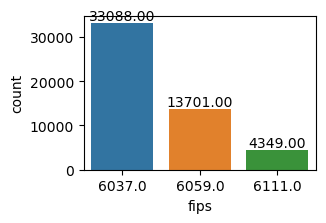

In [23]:
explore_utils.explore_univariate_categorical_cols(df)

Descriptive Stats:



,bathrooms,bedrooms,sqft,age,property_value
count,51138.000000,51138.000000,51138.000000,51138.000000,5.113800e+04
mean,2.294399,3.302397,1914.244730,52.866498,5.267097e+05
std,1.013918,0.933582,998.573994,22.943001,7.512584e+05
min,0.000000,0.000000,128.000000,0.000000,1.000000e+03
25%,2.000000,3.000000,1266.000000,38.000000,1.924400e+05
50%,2.000000,3.000000,1652.000000,56.000000,3.705660e+05
75%,3.000000,4.000000,2289.000000,66.000000,6.143382e+05
max,18.000000,14.000000,21929.000000,138.000000,4.906124e+07


------------------------------------------------------------ 
 BATHROOMS 

Most Frequent Values:
2.0    21632
3.0    10244
1.0     9353
Name: bathrooms, dtype: int64


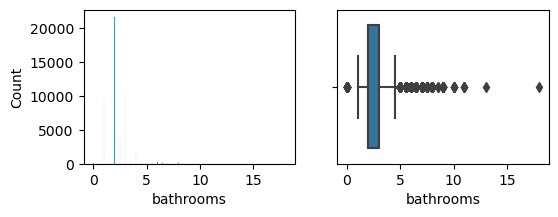


------------------------------------------------------------ 
 BEDROOMS 

Most Frequent Values:
3.0    22977
4.0    14823
2.0     8175
Name: bedrooms, dtype: int64


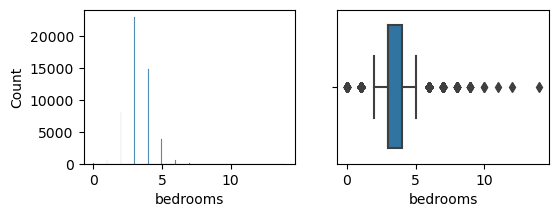


------------------------------------------------------------ 
 SQFT 

Most Frequent Values:
1120.0    127
1200.0    115
1080.0    100
Name: sqft, dtype: int64


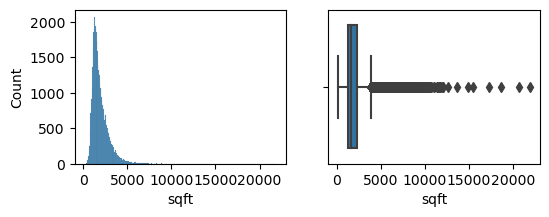


------------------------------------------------------------ 
 AGE 

Most Frequent Values:
61.0    1861
66.0    1597
62.0    1492
Name: age, dtype: int64


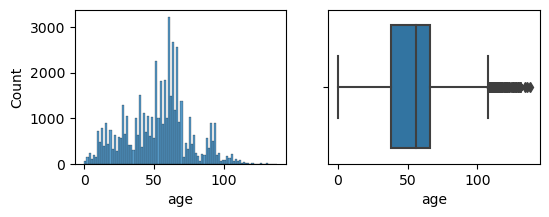


------------------------------------------------------------ 
 PROPERTY_VALUE 

Most Frequent Values:
455000.0    31
600000.0    29
450000.0    24
Name: property_value, dtype: int64


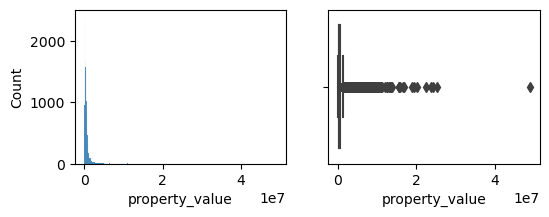

In [24]:
explore_utils.explore_univariate_continuous_cols(df,
                                                 cont_cols=['bathrooms',
                                                            'bedrooms',
                                                            'sqft', 'age',
                                                            'property_value'])

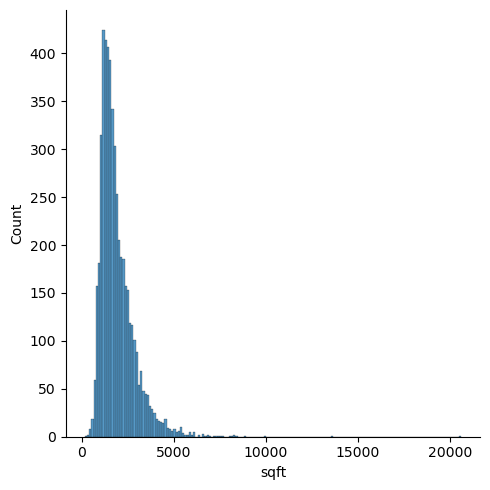

In [25]:
sns.displot(data=df[df['sqft'] < 100_000].sample(frac=.1, random_state=125), x='sqft')

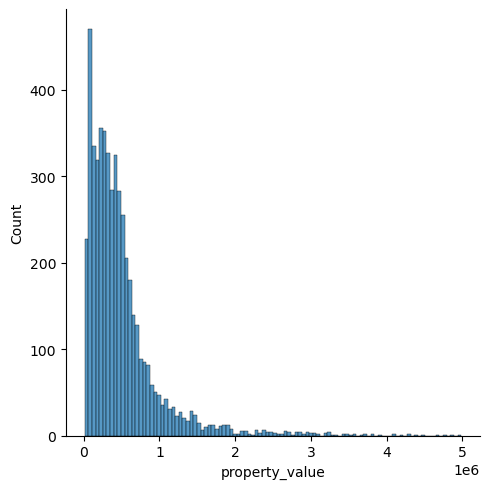

In [26]:
sns.displot(data=df[df['property_value'] < 5_000_000].sample(frac=.1, random_state=125), x='property_value')

Filters:
- 1-4 bathrooms
- 1-6 bedrooms
- age < 105
- sqft < 5,000 and > 500
- property_value < 1,500,000 and > 50_000

In [27]:
# 2 to 5 bedrooms
df = df[(df['bedrooms'] >= 2) & (df['bedrooms'] <= 5)]
# 1 to 4 bathrooms, not including 1.75
df = df[(df['bathrooms'] >= 1) & (df['bathrooms'] <= 4)]
# age < 105
df = df[df['age'] <= 105]
# sqft < 5000 and > 500
df = df[(df['sqft'] >= 500) & (df['sqft'] <= 5000)]
# property_value < 1,500,000 and > 50,000
df = df[(df['property_value'] >= 50_000) & (df['property_value'] <= 1_500_000)]

Descriptive Stats:



,bathrooms,bedrooms,sqft,age,property_value
count,44851.000000,44851.000000,44851.000000,44851.000000,4.485100e+04
mean,2.171022,3.251254,1775.046799,52.576576,4.127762e+05
std,0.742723,0.793165,677.104763,21.171706,2.852080e+05
min,1.000000,2.000000,500.000000,0.000000,5.000100e+04
25%,2.000000,3.000000,1274.000000,39.000000,1.950625e+05
50%,2.000000,3.000000,1623.000000,55.000000,3.571430e+05
75%,3.000000,4.000000,2143.000000,65.000000,5.570905e+05
max,4.000000,5.000000,4997.000000,105.000000,1.500000e+06


------------------------------------------------------------ 
 BATHROOMS 

Most Frequent Values:
2.0    20826
3.0     9607
1.0     7575
Name: bathrooms, dtype: int64


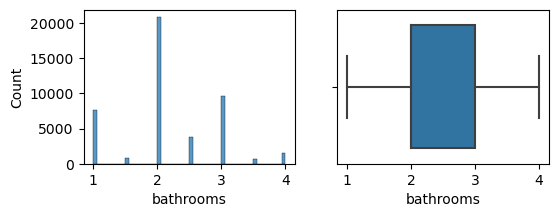


------------------------------------------------------------ 
 BEDROOMS 

Most Frequent Values:
3.0    21556
4.0    13406
2.0     7305
Name: bedrooms, dtype: int64


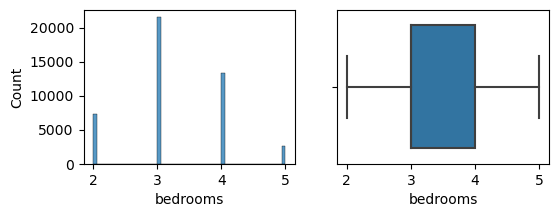


------------------------------------------------------------ 
 SQFT 

Most Frequent Values:
1120.0    118
1200.0    102
1080.0     87
Name: sqft, dtype: int64


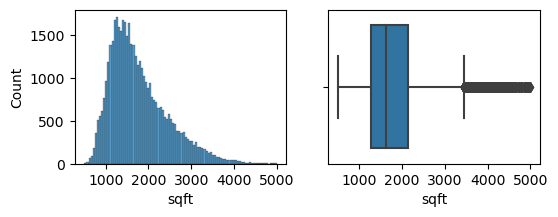


------------------------------------------------------------ 
 AGE 

Most Frequent Values:
61.0    1748
66.0    1457
62.0    1386
Name: age, dtype: int64


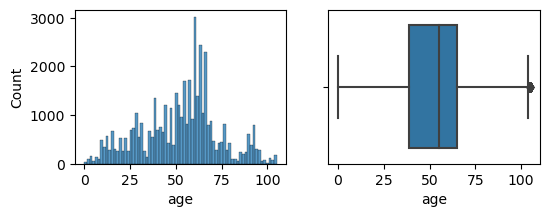


------------------------------------------------------------ 
 PROPERTY_VALUE 

Most Frequent Values:
455000.0    31
600000.0    29
500000.0    23
Name: property_value, dtype: int64


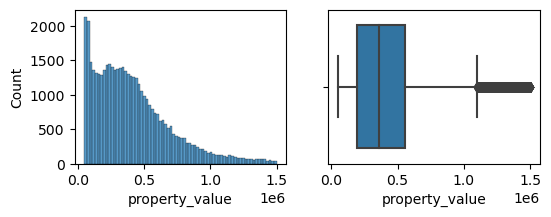

In [28]:
explore_utils.explore_univariate_continuous_cols(df, ['bathrooms', 'bedrooms',
                                                        'sqft', 'age', 'property_value'])

**Make columns with only whole number integers.**

In [29]:
ints_only = lambda x: True if x % 1 == 0 else False
df['bathrooms'].apply((lambda x: True if x % 1 == 0 else False)).all()

False

In [30]:
df.columns

Index(['parcelid', 'id', 'bathrooms', 'bedrooms', 'sqft', 'fips', 'latitude',
       'longitude', 'regionidcity', 'regionidzip', 'property_value',
       'transaction_date', 'age'],
      dtype='object')

In [31]:
# checking which columns only have integers
for col in df.columns:
    if col == 'transaction_date': continue
    if df[col].apply(lambda x: True if x % 1 == 0 else False).all():
        print(col)
        df[col] = df[col].astype(int)
df.info()

parcelid
id
bedrooms
sqft
fips
latitude
longitude
regionidcity
regionidzip
property_value
age
<class 'pandas.core.frame.DataFrame'>
Int64Index: 44851 entries, 52520 to 0
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   parcelid          44851 non-null  int64  
 1   id                44851 non-null  int64  
 2   bathrooms         44851 non-null  float64
 3   bedrooms          44851 non-null  int64  
 4   sqft              44851 non-null  int64  
 5   fips              44851 non-null  int64  
 6   latitude          44851 non-null  int64  
 7   longitude         44851 non-null  int64  
 8   regionidcity      44851 non-null  int64  
 9   regionidzip       44851 non-null  int64  
 10  property_value    44851 non-null  int64  
 11  transaction_date  44851 non-null  object 
 12  age               44851 non-null  int64  
dtypes: float64(1), int64(11), object(1)
memory usage: 4.8+ MB


**Make column with the county names (for exploration).**

In [32]:
df['county'] = df['fips'].replace({6037:'LA',
                                  6059:'Orange',
                                  6111:'Ventura'})
df.head(3)

,parcelid,id,bathrooms,bedrooms,sqft,fips,latitude,longitude,regionidcity,regionidzip,property_value,transaction_date,age,county
52520,12826780,1187175,2.0,3,1762,6037,33937685,-117996709,14634,96171,522000,2017-09-25,61,LA
52518,17239384,2968375,2.0,4,1612,6111,34300140,-118706327,27110,97116,67205,2017-09-21,52,Ventura
52517,11000655,673515,2.0,2,1286,6037,34245368,-118282383,12447,96284,354621,2017-09-20,76,LA


In [33]:
for col in df.columns:
    print(df[col].nunique())

44851
44851
7
4
3381
3
43536
43733
175
375
33116
254
106
3


Encode categoricals

In [34]:
df = pd.concat([df, pd.get_dummies(df[['bathrooms', 'bedrooms', 'county']].astype(str))],
               axis=1).drop(columns=['fips'])

In [35]:
def prep_zillow(df = get_sql_data( '''
                                    SELECT p.parcelid, p.id, p.bathroomcnt, p.bedroomcnt,
                                            p.calculatedfinishedsquarefeet, p.fips,
                                            p.latitude, p.longitude, p.yearbuilt, p.regionidcity,
                                            p.regionidzip, p.taxvaluedollarcnt, pred.transactiondate
                                    FROM zillow.properties_2017 AS p
                                        JOIN zillow.predictions_2017 AS pred USING (parcelid)
                                    WHERE (p.propertylandusetypeid IN (261, 262, 263, 264, 279));
                                    ''',
                                  'zillow',
                                  'data/zillow_raw.csv'),
                filename='data/zillow.csv'):
    '''
        This function takes the raw zillow data and transforms data for exploration and modeling
    '''
    # keep only 2017 transactions
    df = df[df['transactiondate'].str.startswith('2017')]
    
    # drop duplicate home id's. sort by transactiondate to keep most recent transaction date
    df = df.sort_values(by=['transactiondate'], ascending=False)\
           .drop_duplicates(['id'])
    
    # drop duplicate home locations. sort by transactiondate to keep most recent transaction date
    df = df.sort_values(by=['transactiondate'], ascending=False)\
           .drop_duplicates(['latitude','longitude'])

    # rename columns
    df.columns = ['parcelid', 'id', 'bathrooms', 'bedrooms', 'sqft', 'fips', 'latitude',
                   'longitude', 'year_built', 'regionidcity', 'regionidzip',
                   'property_value', 'transaction_date']
    
    # drop rows with missing values
    df = df.dropna()
    
    # change year_built to age
    df['age'] = df['year_built'].max() - df['year_built']
    df = df.drop(columns=['year_built'])
    
    # filter data
    # 2 to 5 bedrooms
    df = df[(df['bedrooms'] >= 2) & (df['bedrooms'] <= 5)]
    # 1 to 4 bathrooms, not including 1.75
    df = df[(df['bathrooms'] >= 1) & (df['bathrooms'] <= 4)]
    # age < 105
    df = df[df['age'] <= 105]
    # sqft < 5000 and > 500
    df = df[(df['sqft'] >= 500) & (df['sqft'] <= 5000)]
    # property_value < 1,500,000 and > 50,000
    df = df[(df['property_value'] >= 50_000) & (df['property_value'] <= 1_500_000)]
    
    # change whole number float columns to integer data types
    for col in df.columns:
        if col == 'transaction_date': continue
        if df[col].apply(lambda x: True if x % 1 == 0 else False).all():
            df[col] = df[col].astype(int)

    # add county name column
    df['county'] = df['fips'].replace({6037:'LA',
                                  6059:'Orange',
                                  6111:'Ventura'})
    
    # encode categoricals and drop county code columns
    df = pd.concat([df, pd.get_dummies(df[['bathrooms', 'bedrooms', 'county']].astype(str))],
               axis=1).drop(columns=['fips'])
    
    # save csv
    df.to_csv(filename, index=False)
    
    return df
    

In [36]:
df = prep_zillow()

In [37]:
df

,parcelid,id,bathrooms,bedrooms,sqft,latitude,longitude,regionidcity,regionidzip,property_value,transaction_date,age,county,bathrooms_1.0,bathrooms_1.5,bathrooms_2.0,bathrooms_2.5,bathrooms_3.0,bathrooms_3.5,bathrooms_4.0,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,county_LA,county_Orange,county_Ventura
52520,12826780,1187175,2.0,3,1762,33937685,-117996709,14634,96171,522000,2017-09-25,61,LA,0,0,1,0,0,0,0,0,1,0,0,1,0,0
52518,17239384,2968375,2.0,4,1612,34300140,-118706327,27110,97116,67205,2017-09-21,52,Ventura,0,0,1,0,0,0,0,0,0,1,0,0,0,1
52517,11000655,673515,2.0,2,1286,34245368,-118282383,12447,96284,354621,2017-09-20,76,LA,0,0,1,0,0,0,0,1,0,0,0,1,0,0
52508,12410050,2900077,1.0,2,1023,33880374,-118112653,44116,96208,222739,2017-09-19,60,LA,1,0,0,0,0,0,0,1,0,0,0,1,0,0
52497,10867042,986237,2.0,3,2141,34150146,-118490857,12447,96426,887003,2017-09-19,62,LA,0,0,1,0,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,12069064,870991,1.0,2,738,34149214,-118239357,45457,96325,218552,2017-01-01,94,LA,1,0,0,0,0,0,0,1,0,0,0,1,0,0
4,12095076,781532,3.0,4,2962,34145202,-118179824,47019,96293,773303,2017-01-01,66,LA,0,0,0,0,1,0,0,0,0,1,0,1,0,0
3,12177905,2288172,3.0,4,2376,34245180,-118240722,396551,96330,145143,2017-01-01,46,LA,0,0,0,0,1,0,0,0,0,1,0,1,0,0
2,14186244,11677,2.0,3,1243,33886168,-117823170,21412,97078,564778,2017-01-01,54,Orange,0,0,1,0,0,0,0,0,1,0,0,0,1,0


Summary of data transformations:
- Dropped redundant columns (`['calculatedbathnbr', 'fullbathcnt', 'roomcnt', 'regionidcounty']`) and columns with lots of missing values (`['numberofstories', 'regionidneighborhood']`)
- For homes with duplicate locations and id's, I kept homes with most recent transactions.
- Renamed columns
- Dropped rows with missing values
- Filtered data/outliers:
    - Only 2017 transaction dates
    - 1-4 bathrooms
    - 1-6 bedrooms
    - age < 105
    - sqft < 5,000 and > 500
    - property_value < 1,500,000 and > 50_000
- Changed columns. with only integers to `int` data types
- Made county with column names
- Encoded categorical columns: count, bedrooms, bathrooms
- Generalized transformations into a function and saved data.